In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Task 7.1: Combine year 2019 and year 2020’s crime records into one pandas dataframe. Drop duplicates as well as any record that has missing values in the following columns: “INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. Save the “cleaned” pandas dataframe to a separate csv file. Use the "OFFENSE_DESCRIPTION" column to identify violent vs. property crime incidents, and based on the cleaned dataframe, count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively. Print the results. Do you see any trend? 

In [10]:
#os.chdir('/Users/[editted]/Desktop/compSoc/datasets')

Boston_crime_2019 = pd.read_csv("/Users/[editted]/Downloads/tmp9mkqyv6b.csv")
Boston_crime_2020 = pd.read_csv("/Users/[editted]/Downloads/script_113631134_20210423193017_combine.csv")
Boston_crime_merged_df = pd.concat([Boston_crime_2019, Boston_crime_2020])

Boston_crime_dropped_df = Boston_crime_merged_df.dropna(subset = ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 
                             'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])

Boston_crime_dropped_no_dups_df = Boston_crime_dropped_df.drop_duplicates()
print(Boston_crime_dropped_no_dups_df)
Boston_crime_dropped_no_dups_df.to_csv('clean_crime.csv', index=False)

Boston_crime_merged_column_names = Boston_crime_dropped_no_dups_df.head()

Boston_crime_merged_column_names

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


      INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0           102091671          2647                 NaN   
1           102095489          3115                 NaN   
2           102096818          2905                 NaN   
4           129099920          3301                 NaN   
5           129099936          1106                 NaN   
...               ...           ...                 ...   
70889        20063425          3114                 NaN   
70890        20062356          1107                 NaN   
70891        20046400          1501                 NaN   
70892        20038446          1501                 NaN   
70893        20030892           540                 NaN   

                                     OFFENSE_DESCRIPTION DISTRICT  \
0                              THREATS TO DO BODILY HARM       B3   
1                                     INVESTIGATE PERSON      E18   
2                            VAL - VIOLATION OF AUTO LAW       A1   
4              

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,102091671,2647,NaN,THREATS TO DO BODILY HARM,B3,417,0,2019-11-12 12:00:00,2019,11,Tuesday,12,NaN,MORA ST,42.282082,-71.073649,"(42.28208197671972, -71.07364874515646)"
1,102095489,3115,NaN,INVESTIGATE PERSON,E18,520,0,2019-11-25 16:30:00,2019,11,Monday,16,NaN,POYDRAS ST,42.256216,-71.124019,"(42.256215920402155, -71.12401947329023)"
2,102096818,2905,NaN,VAL - VIOLATION OF AUTO LAW,A1,,0,2019-11-30 21:00:00,2019,11,Saturday,21,NaN,SUDBURY ST & CAMBRIDGE ST\nBOSTON MA 02108\nU...,42.360866,-71.061316,"(42.360866027118476, -71.0613160019785)"
4,129099920,3301,NaN,VERBAL DISPUTE,B2,330,0,2019-12-12 07:50:00,2019,12,Thursday,7,NaN,COLUMBIA ROAD,0.000000,0.000000,"(0, 0)"
5,129099936,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,B2,288,0,2019-11-29 06:00:00,2019,11,Friday,6,NaN,WASHINGTON ST,42.329748,-71.084540,"(42.329748204791635, -71.08454011649543)"


In [17]:
# Identify violent vs. property crimes using "OFFENSE_DESCRIPTION"
violent_crimes = ["RAPE", "ROBBERY", "ASSAULT"]
property_crimes = ["BURGULARY", "LARCENY", "THEFT", "AUTO THEFT", "ARSON"]

violent_crimes_df = pd.DataFrame()
property_crimes_df = pd.DataFrame()

Boston_crime_dropped_no_dups_df["Indexes"] = Boston_crime_dropped_no_dups_df["OFFENSE_DESCRIPTION"].str.find("RAPE")

for index, row in Boston_crime_dropped_no_dups_df.iterrows():
    if row["OFFENSE_DESCRIPTION"] in violent_crimes:
        violent_crimes_df.append(row, ignore_index=True)

In [15]:
violent_crimes_df.head()
len(violent_crimes_df)

0

Task 7.2: Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020. X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years. 

In [12]:
# Violent crimes: robbery, assault, rape
# Property crimes: burgulary, larceny, theft, auto theft, arson

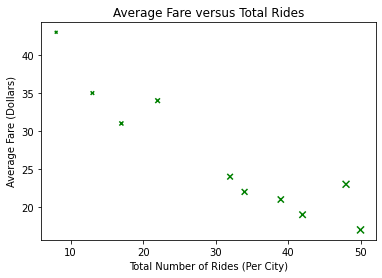

In [13]:
plt.scatter(violent_crimes,property_crimes, c='green', marker='x', s=violent_crimes)
#s=size of markers is set to X so the markers' size are relative to the number of rides in the city)
plt.xlabel('Annual Propoerty Crimes')
plt.ylabel('Annual Violent Crimes')
plt.title('Annual Violent Crimes by District in Boston (2019 and 2020')
plt.show()

Task 7.3: Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. X axis: districts. Y axis: annual sums. Use different bars to represent data from different years. 

In [ ]:
plt.bar(districts, annual_sums)

Task 7.4: Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. X axis: quarters. Y axis: district-level shooting incidents (counts).

In [ ]:
sns.violinplot(data=Boston_crime_dropped_no_dups_df, x="Quarters", y="District-Level Shooting Incidents")